
# Zeitdiskreter Integrator # 
## P/N-Plan, Frequenzgang und Impulsantwort ##

*This jupyter notebook is part of a [collection of notebooks](../) on various topics of Digital Signal Processing hosted @ [https://github.com/chipmuenk/dsp_fpga](https://github.com/chipmuenk/dsp_fpga)* "Digitale Signalverarbeitung auf FPGAs"

(c) 2016, 2017 -Oct-07 Rebecca Janßen and Prof. Dr. Christian Münker 

In [2]:
# Zeige Plots nicht als neue Fenster:
%matplotlib inline 

from __future__ import division, print_function

import numpy as np
from numpy import (pi, log10, exp, sqrt, sin, cos, tan, angle, arange, 
                   linspace, array, zeros, ones)
import scipy.signal as sig

import matplotlib.pyplot as plt
from matplotlib.pyplot import (figure, plot, stem, grid, xlabel, ylabel, setp,
    subplot, tight_layout, title, clf, xlim, ylim)

from ipywidgets import (interact,FloatSlider,IntSlider)

from IPython.display import Image

import sys, os
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
import dsp_fpga_lib as dsp


def filterIntegrator(alpha=0):
    b = [1, 0] #Zaehler: z
    a = [1, alpha] #Nenner: z+alpha
    
    if(alpha!=-1):
        figure(figsize=(15,6))
        subplot(131)
        title('PN-Plan (zplane)')
        dsp.zplane(b,a) #Plotte P/N Diagramm
        xlabel('$Re$') 
        ylabel('$Im$')

        #Frequenzgang H(f)
        subplot(132)
        title('Frequenzgang')
        f_S=1
        [W,H] = sig.freqz(b,a,1024, f_S)
        plot(W/(2*pi),abs(H),linewidth = 2)
        xlabel(r'$F$  bzw. $\Omega / 2 \pi$') 
        ylabel(r'$|H(F)| \; \rightarrow$')

        #Berechne 20 Werte der Impulsantwort:
        subplot(133)
        title('Impulsantwort')
        [himp,t] = dsp.impz(b,a,20,f_S)
        (ml, sl, bl) = stem(t,himp) # Impulsantwort
        setp(ml,'markerfacecolor','r',	'markersize',8)
        setp(sl,'linewidth',2)
        xlabel('$n$'); ylabel(r'$h[n]$')

        #sicherstellen, dass Plots nicht überlappen
        tight_layout()
        
        plt.show #Plot anzeigen
    else:
        print('Plot kann nicht berechnet werden, da durch Null geteilt würde!')

Das hier ist ein wenig Dummy-Text und die Latex-Formel für den Integrator:
$$H_i(z) = \frac{z}{z - \alpha} $$

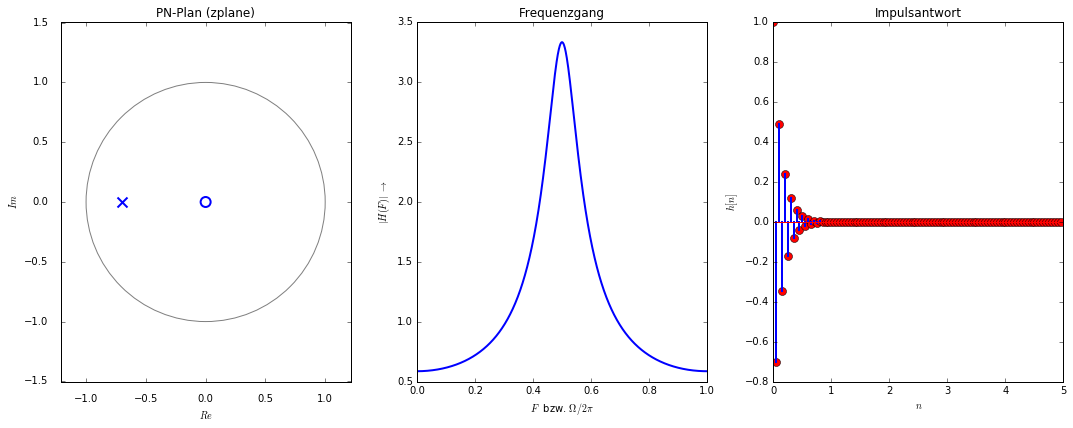

In [3]:
#Slider erzeugen, der filterIntegrator bei jeder Änderung aufruft
interact(filterIntegrator, alpha=FloatSlider(value=0.7,min=-2,max=2,step=0.1,continuous_update=False));

**Copyright**

This notebook is provided as [Open Educational Resource](https://en.wikipedia.org/wiki/Open_educational_resources). Feel free to use the notebook for your own purposes. The text is licensed under [Creative Commons Attribution 4.0](https://creativecommons.org/licenses/by/4.0/), the code of the IPython examples under the [MIT license](https://opensource.org/licenses/MIT). Please attribute the work as follows: *Christian Münker, Digital Signal Processing auf FPGAs - Vorlesungsunterlagen mit Simulationsbeispielen, 2017*.

The latest version of this notebook can be found at

[https://github.com/chipmuenk/dsp_fpga/blob/master/notebooks/01_LTI/Integrator.ipynb](https://github.com/chipmuenk/dsp_fpga/blob/master/notebooks/01_LTI/Integrator.ipynb)